## Chi2 test -   
* **The chi-squared test is a statistical hypothesis test used to determine if there is a significant association between two categorical variables.** .  

* **It's often employed in data analysis to assess whether there is a relationship between two variables or if they are independent.**

In [27]:
import pandas as pd
import numpy as mp
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Loan Prediction Dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df = []

for col in data.columns:
    if data[col].dtype == 'object':
        df.append(col)
df

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
df = data[['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed','Credit_History',
 'Property_Area',
 'Loan_Status']]

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [11]:
df.isnull().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [15]:
# lets fill the missing value with mode as the dataset is categorical
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])



In [19]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


In [20]:
from sklearn.feature_selection import chi2

In [21]:
x = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [22]:
chi_score = chi2(x,y)

In [34]:
chi_score

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 2.60058772e+01, 3.77837464e-01]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 3.40379591e-07, 5.38762867e-01]))

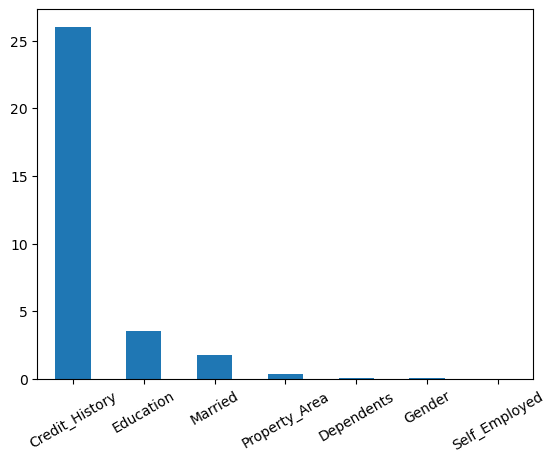

In [28]:
chi_values = pd.Series(chi_score[0], index = x.columns)
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot(kind = 'bar')
plt.xticks(rotation = 30)
plt.show()

### Higher the value better the feature for the analysis 

*  **If the p-value is below a chosen significance level (e.g., 0.05), you would conclude that there is a significant relationship between the variables.**

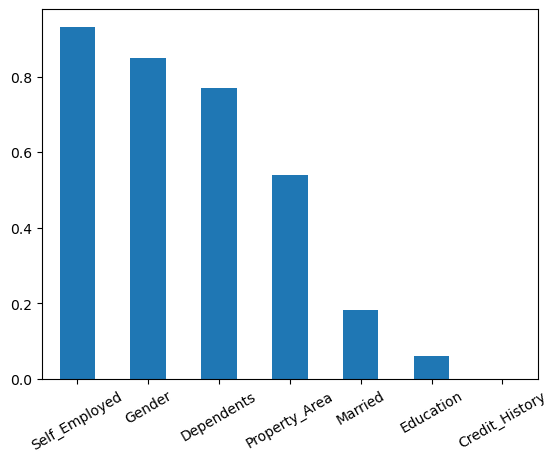

In [31]:
p_values = pd.Series(chi_score[1], index = x.columns)
p_values.sort_values(ascending = False, inplace = True)
p_values.plot(kind='bar')
plt.xticks(rotation = 30)
plt.show()

##  Use cases Of Chi2 test

- **Goodness of Fit Test**: Assess if observed data fits an expected distribution.
- **Independence Test**: Determine if two categorical variables are associated or independent.
- **Contingency Table Analysis**: Examine associations between categorical variables.
- **Surveys**: Assess independence between survey responses and demographics.
- **Market Research**: Analyze associations in consumer preferences.
- **Quality Control**: Evaluate differences in production processes.
- **Text Analysis**: Compare word/topic distributions in documents.
- **A/B Testing**: Measure effectiveness of different versions of a product or webpage.